In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from tabulate import tabulate   # Import da biblioteca para facilitar o print de tabelas.

plt.rcParams["font.family"] = "Times New Roman"

In [77]:
# Funções.
def _euler_explicito_(y_, xn, yn, h):
    return yn + h * y_(xn, yn)

def _calc_euler_explicito_(ydiff, n, x, y0, h):
    #h = x[1] - x[0]
    y_aproximado = [y0]

    for i in range(1, n):
        yn1 = _euler_explicito_(ydiff, x[i], y_aproximado[-1], h)
        y_aproximado.append(yn1)
    return y_aproximado

def _make_graph_(x, y_aproximado, f_esperado, h, ex):
    plt.figure(dpi=100, figsize = (6, 4))
    plt.title(ex+" h = %f" %h, loc="center", pad=None)
    plt.plot(x, y_aproximado, '--', label="Aproximação")
    plt.plot(x, f_esperado(x), '-',label="Esperado")
    plt.legend()
    plt.show()

def _make_graph_error(error_x, error_y, y_func, x0, ex):
    plt.figure(1, figsize=(10,3), dpi=150)
    
    plt.subplot(121)
    plt.title(label=ex+" Aproximações feitas.", loc="center", pad=None)
    for i in range(len(error_x)):
        #plt.plot(error_x[i], error_y[i], label='h = %f' % (error_x[i][1]-error_x[i][0]))
        plt.plot(error_x[i], error_y[i])
    plt.plot(np.linspace(x0, 5, 100), y_func(np.linspace(x0, 5, 100)), label='Esperado')
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.title(label=ex+" Erro absoluto encontrado.", loc="center", pad=None)
    for i in range(len(error_x)):
        #plt.plot(error_x[i], abs(y_func(error_x[i]) - error_y[i]), label='h = %f' % (error_x[i][1]-error_x[i][0]))
        plt.plot(error_x[i], abs(y_func(error_x[i]) - error_y[i]))
    plt.legend()
    plt.grid()

    plt.show()

def _erro_(ydiff, x0, y0, n, h):
    error_x = list()
    error_y = list()
    for i in range(1, n):
        y_aproximado = [y0]
        n = 1 * 2**i + 1
        x = np.linspace(x0, 5, n)

        for i in range(1, n):
            y_aproximado.append(_euler_explicito_(ydiff, x[i], y_aproximado[-1], h))
        error_x.append(x)
        error_y.append(y_aproximado)
    return error_x, error_y

    



Exercício 1), 2) e 3)


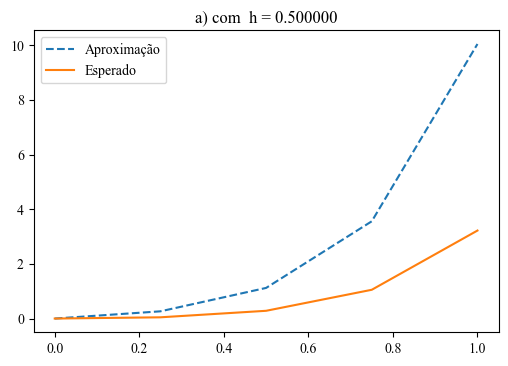

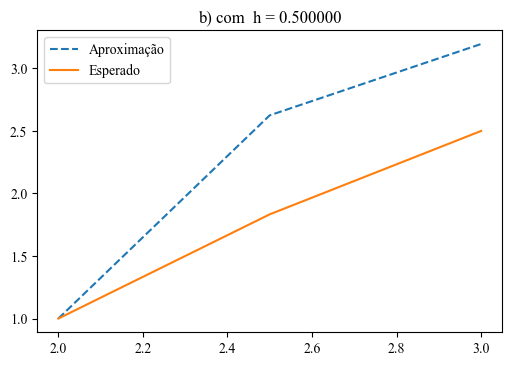

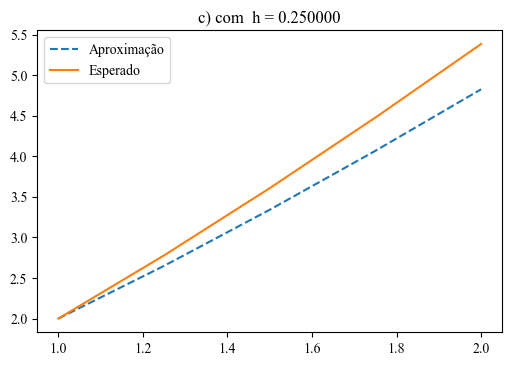

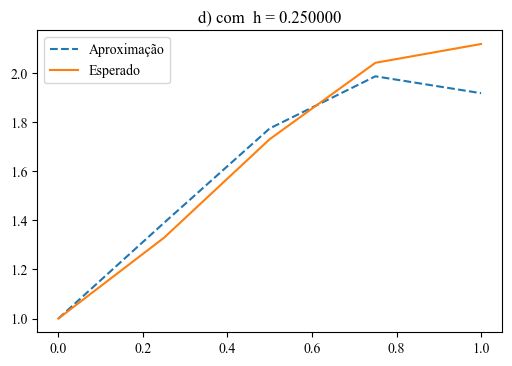

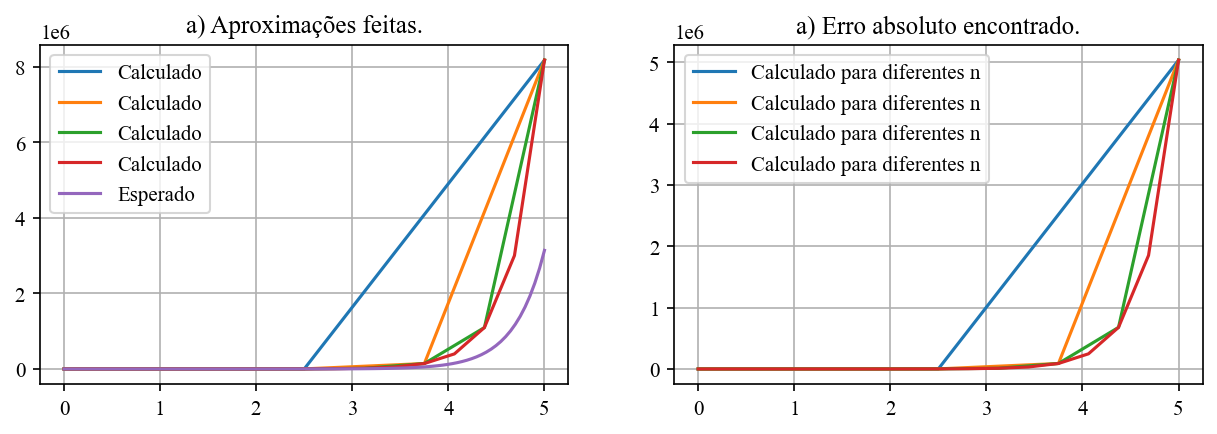

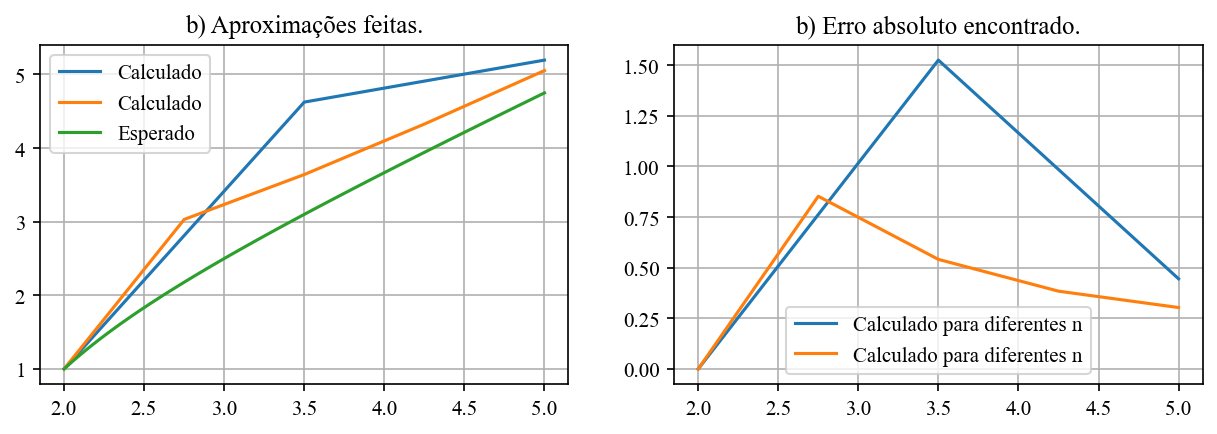

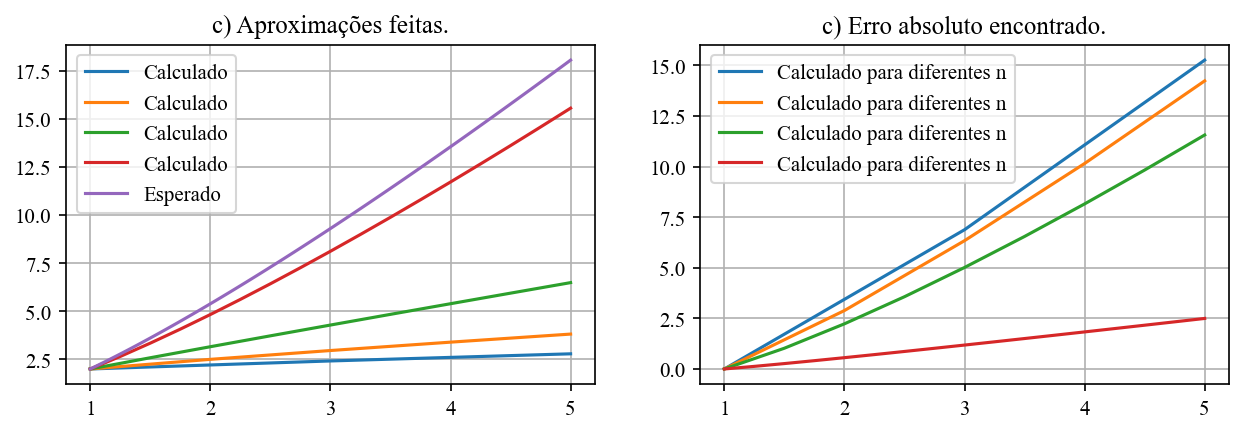

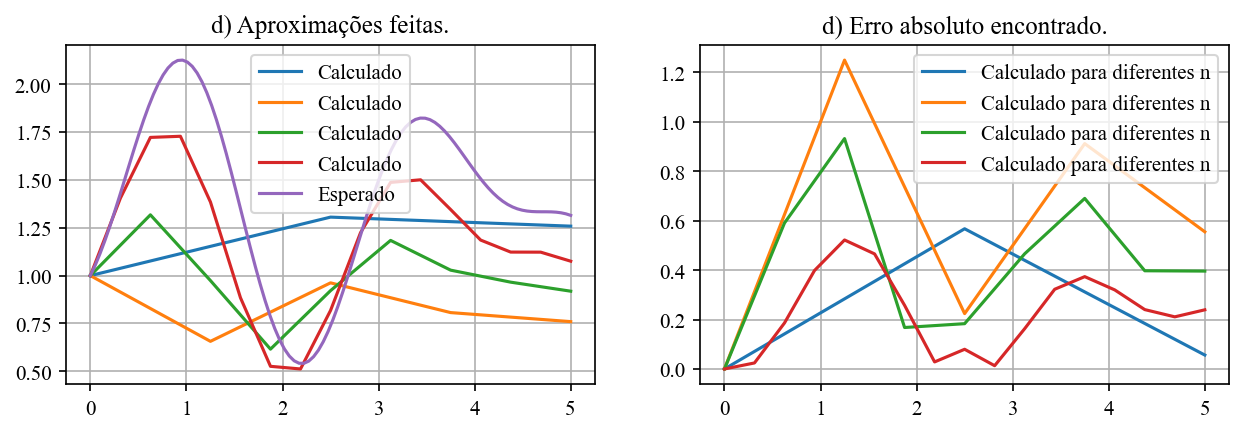

In [27]:
print("Exercício 1), 2) e 3)")

n_a = 5
n_b = 3
n_c = 5
n_d = 5

ln = np.log

ydiff_a = lambda t, y: t * np.exp(3 * t) - 2 * y
ydiff_b = lambda t, y: 1 + ((t - y)**2)
ydiff_c = lambda t, y: 1 + y/t
ydiff_d = lambda t, y: np.cos(2 * t) + np.sin(3 * t)

y_a = lambda t: ((1/5) * t * np.exp(3 * t)) - ((1/25) * np.exp(3* t)) + ((1/25) * np.exp(-2 * t))
y_b = lambda t: t + (1/(1 - t))
y_c = lambda t: t * ln(t) + 2 * t
y_d = lambda t: (1/2) * np.sin(2 * t) - (1/3) * np.cos(3 * t) + (4/3)

t0_a = 0
t0_b = 2
t0_c = 1
t0_d = 0

y0_a = 0
y0_b = 1
y0_c = 2
y0_d = 1

t_a = np.linspace(t0_a, 1, n_a)
t_b = np.linspace(t0_b, 3, n_b)
t_c = np.linspace(t0_c, 2, n_c)
t_d = np.linspace(t0_d, 1, n_d)

h_a = 0.5
h_b = 0.5
h_c = 0.25
h_d = 0.25

# aproximação = euler_explicito(ydiff, n, x0, y0, h)
y_aproximado_a = _calc_euler_explicito_(ydiff_a, n_a, t_a, y0_a, h_a)
y_aproximado_b = _calc_euler_explicito_(ydiff_b, n_b, t_b, y0_b, h_b)
y_aproximado_c = _calc_euler_explicito_(ydiff_c, n_c, t_c, y0_c, h_c)
y_aproximado_d = _calc_euler_explicito_(ydiff_d, n_d, t_d, y0_d, h_d)

# faz_grafico(x0, yaproximado, y_function, h)
_make_graph_(t_a, y_aproximado_a, y_a, h_a, "a) com ")
_make_graph_(t_b, y_aproximado_b, y_b, h_b, "b) com ")
_make_graph_(t_c, y_aproximado_c, y_c, h_c, "c) com ")
_make_graph_(t_d, y_aproximado_d, y_d, h_d, "d) com ")

#erros_x, erros_y = erro(ydiff, x0, y0, n, h)
erro_x_a, erro_y_a = _erro_(ydiff_a, t0_a, y0_a, n_a, h_a)
erro_x_b, erro_y_b = _erro_(ydiff_b, t0_b, y0_b, n_b, h_b)
erro_x_c, erro_y_c = _erro_(ydiff_c, t0_c, y0_c, n_c, h_c)
erro_x_d, erro_y_d = _erro_(ydiff_d, t0_d, y0_d, n_d, h_d)

# grafico_erro(erros_x, erros_y, y_function, x0, n)
_make_graph_error(erro_x_a, erro_y_a, y_a, t0_a, "a)")
_make_graph_error(erro_x_b, erro_y_b, y_b, t0_b, "b)")
_make_graph_error(erro_x_c, erro_y_c, y_c, t0_c, "c)")
_make_graph_error(erro_x_d, erro_y_d, y_d, t0_d, "d)")

In [97]:
print("Exercício 4)")

def _euler_modificado_(ydiff, x, y0, h, n):
    k1 = ydiff(x, y0)
    k2 = ydiff(x + 0.5 * h, y0 + 0.5 * h * k1)
    y0 = y0 + h * k2
    return y0

def _euler_runge_kutta_(ydiff, x, y0, h, n):
    k1 = ydiff(x, y0)
    k2 = ydiff(x + h, y0 + h * k1)
    y0 = y0 + (h/2)*(k1 + k2)
    return y0

def _euler_modificado_2(ydiff, x, y0, h, n):
    y_soma = np.zeros(n)
    y_soma[0] = y0
    for i in range(0, n-1):
        k1 = ydiff(x[i], y_soma[i])
        k2 = ydiff(x[i] + 0.5 * h, y_soma[i] + 0.5 * h * k1)
        y_soma[i+1] = y_soma[i] + h * k2
    return y_soma

def _euler_runge_kutta_2(ydiff, x, y0, h, n):
    y_soma = np.zeros(n)
    y_soma[0] = y0
    for i in range(0, n-1):
        k1 = ydiff(x[i], y_soma[i])
        k2 = ydiff(x[i] + h, y_soma[i] + h * k1)
        y_soma[i+1] = y_soma[i] + (h/2)*(k1 + k2)
    return y_soma

def _make_graph_error(error_x, error_y, y_func, x0, ex, n):
    plt.figure(2, figsize=(10,3), dpi=150)
    
    plt.subplot(121)
    plt.title(label=ex+" Aproximações feitas.", loc="center", pad=None)
    for i in range(len(error_x)):
        plt.plot(error_x[i], error_y[i], label=str(i))
    plt.plot(np.linspace(x0, 5, n), y_func(np.linspace(x0, 5, n)), label='Esperado')
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.title(label=ex+" Erro absoluto encontrado.", loc="center", pad=None)
    for i in range(len(error_x)):
        plt.plot(error_x[i], abs(y_func(error_x[i]) - error_y[i]), label="Calculado para diferentes n")
    plt.legend()
    plt.grid()
    plt.show()

def _make_graph_compare_(x0, x, y, y_func, ex , n):
    plt.figure(1, figsize=(10,3), dpi=150)

    plt.subplot(121)
    plt.title(label="Aproximação numérica " + ex, loc="center", pad=None)
    plt.plot(x, y, label="Calculado")
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.title(label="Usando y(t) resposta " + ex, loc="center", pad=None)
    plt.plot(np.linspace(x0, 5, n), y_func(np.linspace(x0, 5, n)), label='Esperado', color="red")
    plt.legend()
    plt.grid()
    plt.show()

def _erro_euler_ex4_(ydiff, x0, y0, n, h, tipo):
    error_x = list()
    error_y = list()

    if(tipo == 1):
        for i in range(1, n):
            y_aproximado = [y0]
            n = 1 * 2**i + 1
            x = np.linspace(x0, 5, n)

            for i in range(0, n-1):
                y_aproximado.append(_euler_modificado_(ydiff, x[i], y_aproximado[i], h, n))
            error_x.append(x)
            error_y.append(y_aproximado)
    elif(tipo == 2):
        for i in range(1, n):
            y_aproximado = [y0]
            n = 1 * 2**i + 1
            x = np.linspace(x0, 5, n)

            for i in range(0, n-1):
                y_aproximado.append(_euler_runge_kutta_(ydiff, x[i], y_aproximado[i], h, n))
            error_x.append(x)
            error_y.append(y_aproximado)
    else :
        print("Tipo errado...")
        return None
    return error_x, error_y


Exercício 4)


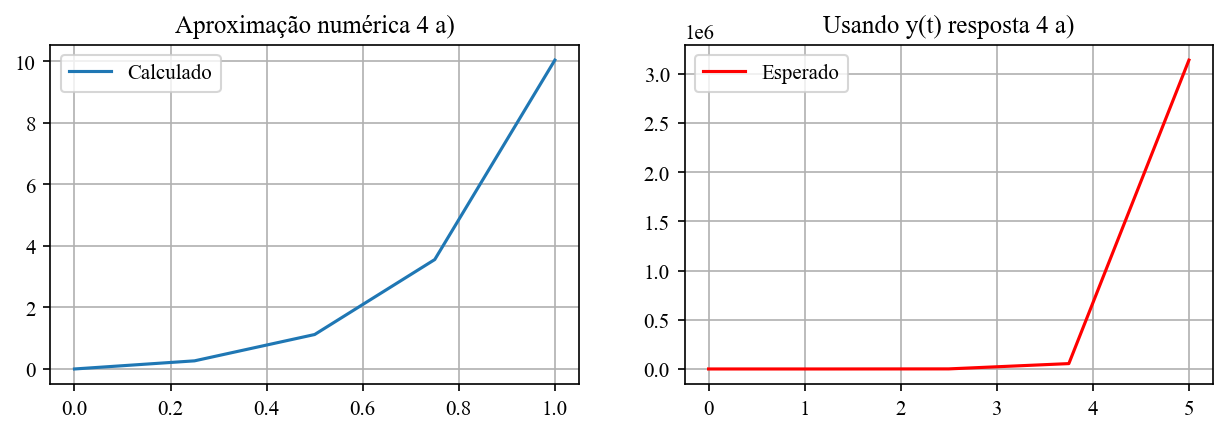

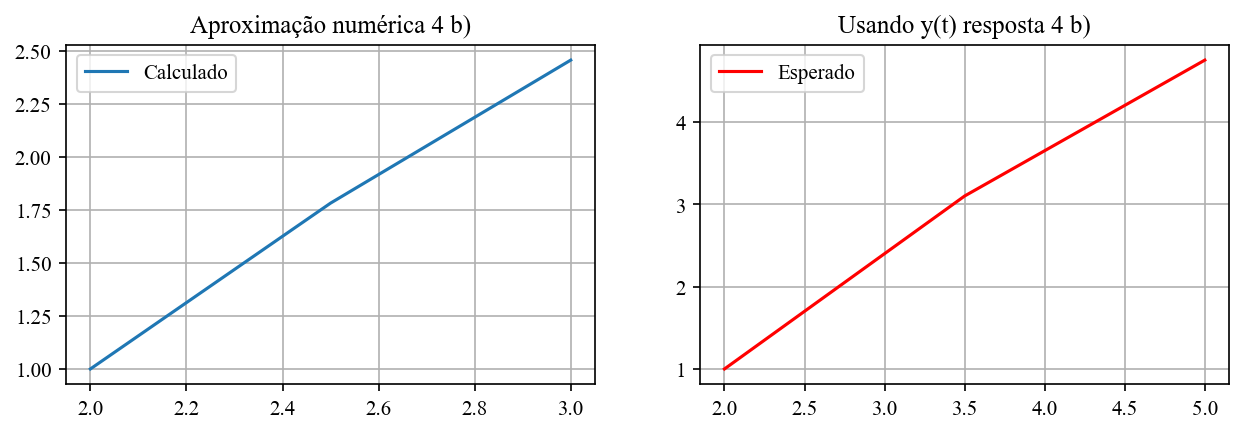

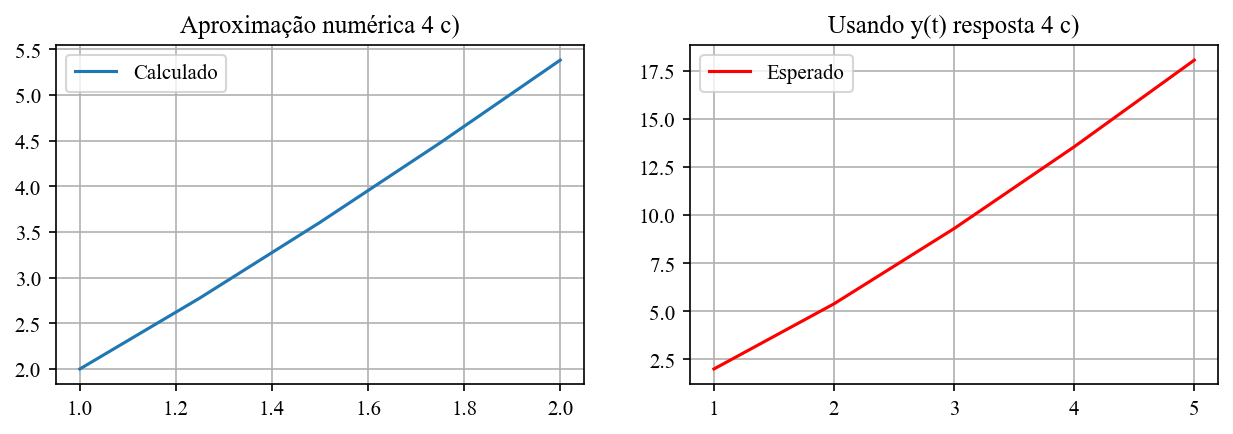

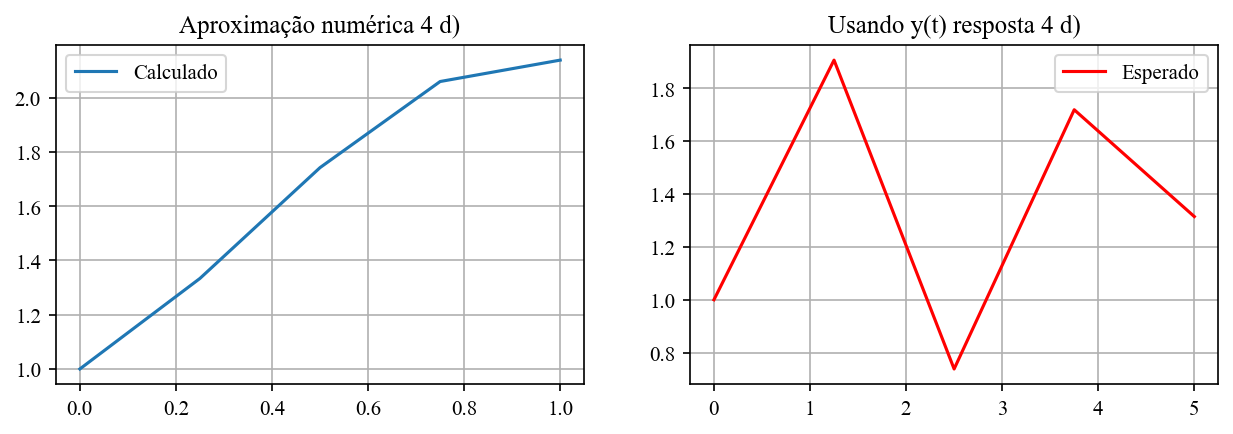

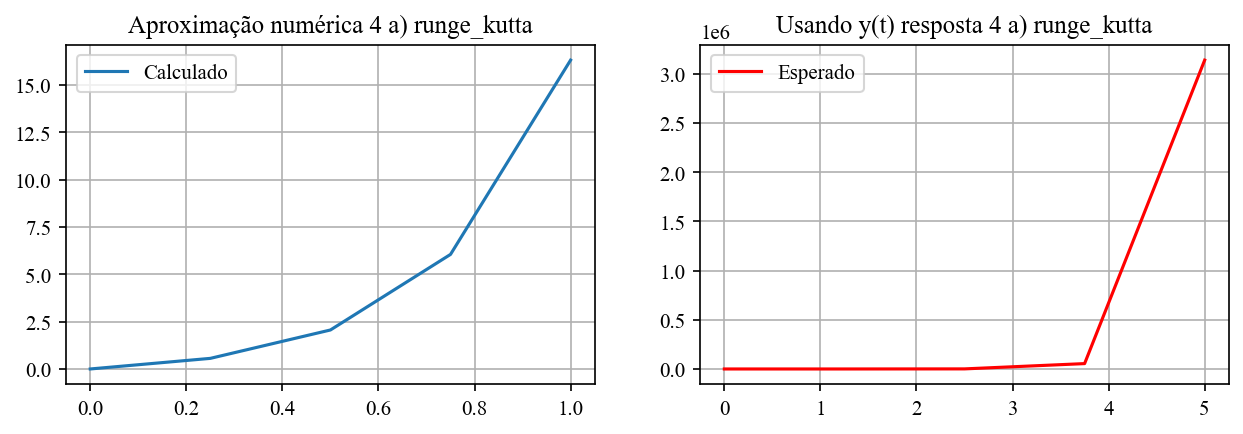

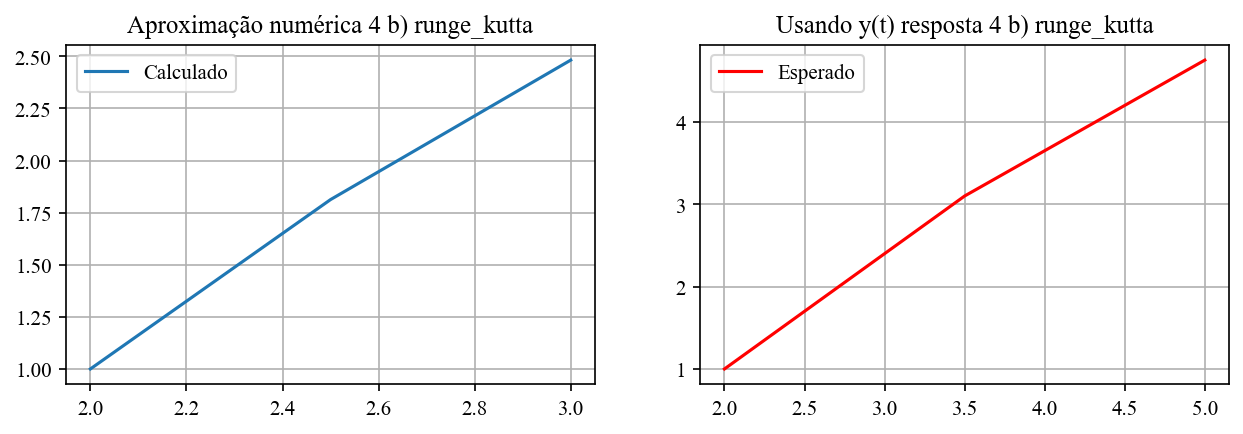

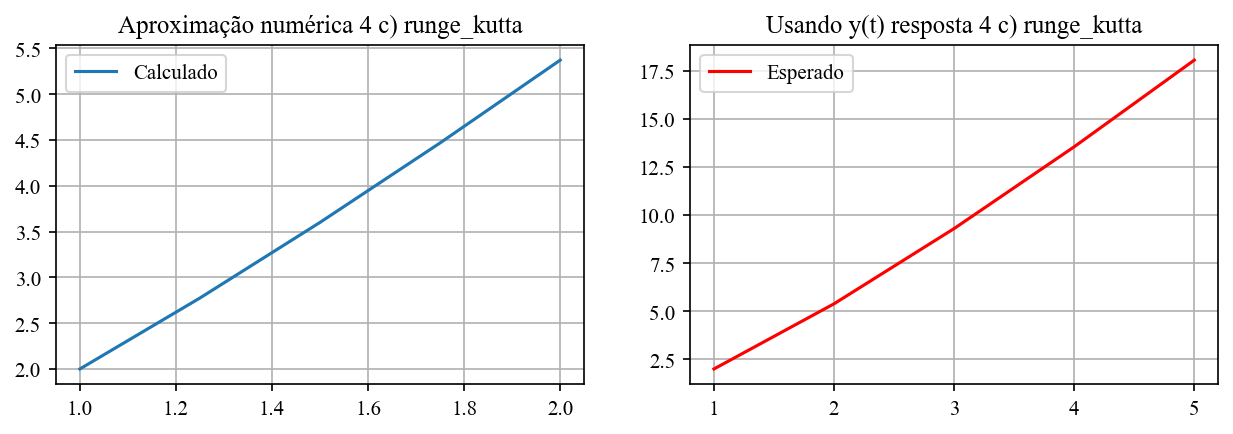

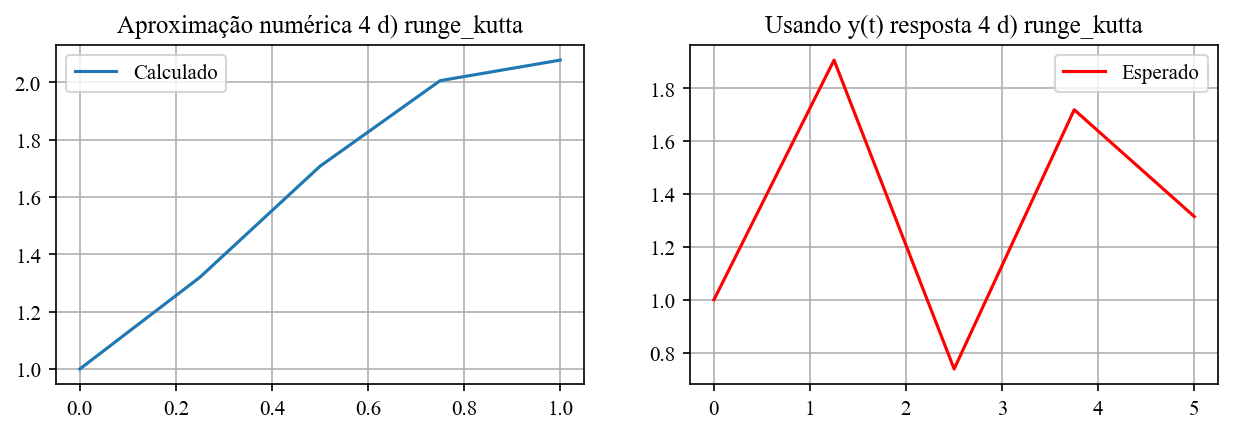

TypeError: _erro_euler_ex4_() takes 6 positional arguments but 7 were given

In [98]:
# valores obtidos com euler modificado.
y_euler_modificado_a = _euler_modificado_2(ydiff_a, t_a, y0_a, h_a, n_a)
y_euler_modificado_b = _euler_modificado_2(ydiff_b, t_b, y0_b, h_b, n_b)
y_euler_modificado_c = _euler_modificado_2(ydiff_c, t_c, y0_c, h_c, n_c)
y_euler_modificado_d = _euler_modificado_2(ydiff_d, t_d, y0_d, h_d, n_d)

# valores obtidos com euler melhorado.
y_euler_rk_a = _euler_runge_kutta_2(ydiff_a, t_a, y0_a, h_a, n_a)
y_euler_rk_b = _euler_runge_kutta_2(ydiff_b, t_b, y0_b, h_b, n_b)
y_euler_rk_c = _euler_runge_kutta_2(ydiff_c, t_c, y0_c, h_c, n_c)
y_euler_rk_d = _euler_runge_kutta_2(ydiff_d, t_d, y0_d, h_d, n_d)

# Comparando as funções
_make_graph_compare_(t0_a, t_a, y_euler_modificado_a, y_a, "4 a)", n_a)
_make_graph_compare_(t0_b, t_b, y_euler_modificado_b, y_b, "4 b)", n_b)
_make_graph_compare_(t0_c, t_c, y_euler_modificado_c, y_c, "4 c)", n_c)
_make_graph_compare_(t0_d, t_d, y_euler_modificado_d, y_d, "4 d)", n_d)

_make_graph_compare_(t0_a, t_a, y_euler_rk_a, y_a, "4 a) runge_kutta", n_a)
_make_graph_compare_(t0_b, t_b, y_euler_rk_b, y_b, "4 b) runge_kutta", n_b)
_make_graph_compare_(t0_c, t_c, y_euler_rk_c, y_c, "4 c) runge_kutta", n_c)
_make_graph_compare_(t0_d, t_d, y_euler_rk_d, y_d, "4 d) runge_kutta", n_d)

# Mostrando o erro calculado
erro_x_a, erro_y_a = _erro_euler_ex4_(ydiff_a, t0_a, y0_a, n_a, h_a, 1)
_make_graph_error(erro_x_a, erro_y_a, y_a, t0_a, "equação a)", n_a)

erro_x_b, erro_y_b = _erro_euler_ex4_(ydiff_a, t0_b, y0_b, n_b, h_b, 1)
_make_graph_error(erro_x_b, erro_y_b, y_b, t0_b, "equação b)", n_b)

erro_x_c, erro_y_c = _erro_euler_ex4_(ydiff_c, t0_c, y0_c, n_c, h_c, 1)
_make_graph_error(erro_x_c, erro_y_c, y_c, t0_c, "equação c)", n_c)

erro_x_d, erro_y_d = _erro_euler_ex4_(ydiff_d, t0_d, y0_d, n_d, h_d, 1)
_make_graph_error(erro_x_d, erro_y_d, y_d, t0_d, "equação d)", n_d)
